<a href="https://colab.research.google.com/github/slvhank1201/PYTHON/blob/main/Semana15PCipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------MATRIZ OPTIMA DE TRANSPORTE---------------------
[[ 30.  90.   0.   0.]
 [100.   0.  50.   0.]
 [ 50.   0.   0.  50.]]
Costo total minimo:  28750.0


<Axes: >

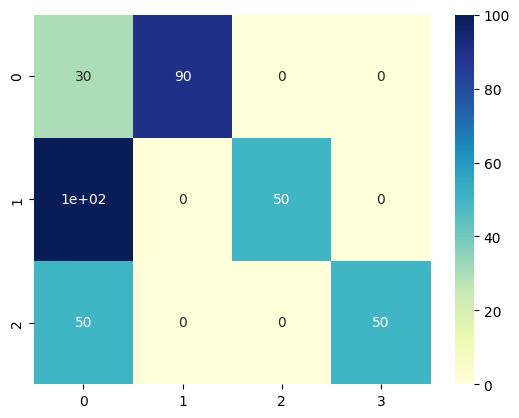

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment, linprog
costos=np.array(
  [
    [40,120,150,25],
    [60,140,160,45],
    [35,115,145,20],

  ]
)
suministro=np.array([120,150,100])
demanda=np.array([180,90,50,50])
origen=["Chiclayo","Piura","Lambayeque"]
demanda_labels=["Lima","Arequipa","Cusco","Trujillo"]
#Formulación para la programación lineal
c=costos.flatten() #Convertir la matriz de 2D en un vector
#aplicamos restricciones de demanda
A_eq=[]
b_eq=[]

for j in range(len(demanda)):
  row=np.zeros(costos.size)
  for i in range(len(suministro)):
    row[i*len(demanda)+j]=1 #Coloca la variable Xij en su posicion correcta
  A_eq.append(row)#aplicamos restriccion alamatriz de desigualdades           #dentro de su vector
  b_eq.append(demanda[j]) #añadiendo del valor de la demanda del destino j
#restricciones de desigualdad
A_ub=[]
b_ub=[]
#recorremos casa origen
for i in range(len(suministro)):
  row=np.zeros(costos.size)
  for j in range(len(demanda)):
    row[i*len(demanda)+j]=1
  A_ub.append(row)
  b_ub.append(suministro[i]) #colocando la oferta del origen i en el lado derecho
#resolvemos el modelo de programacion lineal
res=linprog(c,A_ub=A_ub,b_ub=b_ub,A_eq=A_eq,b_eq=b_eq, method='highs')
solucion=res.x.reshape(costos.shape)
print("------------MATRIZ OPTIMA DE TRANSPORTE---------------------")
print(solucion)
print("Costo total minimo: ",res.fun)




In [18]:
import pulp
#definir el problema
modelo=pulp.LpProblem("Maximizar_Ganancias",pulp.LpMaximize)
#variables de decisión
xA=pulp.LpVariable("Producto_A",lowBound=0,cat="Integer")
xB=pulp.LpVariable("Producto_B",lowBound=0,cat="Integer")

#funcion objetivo
modelo+=40*xA+30*xB,"Ganancia_total"
#restricciones
modelo+=2*xA+xB<=100 #TIEMPO DISPONIBLE
modelo+=xA+2*xB<=80  #RECURSOS DISPONIBLES
modelo+=xA>=0
modelo+=xB>=0
#RESOLVER
modelo.solve(pulp.PULP_CBC_CMD(msg=True))
#RRESULTADOS
print("Estado:",pulp.LpStatus[modelo.status])
print("Fabricar: ",xA.value())
print("Fabricar: ",xB.value())
print("Ganancia máxima: ",pulp.value(modelo.objective))

Estado: Optimal
Fabricar:  40.0
Fabricar:  20.0
Ganancia máxima:  2200.0


In [25]:
#Ejercicio 2
import pulp
#datos
medicos=["M1","M2","M3","M4","M5"]
areas=["UCI","EMERGENCIAS","PEDIATRIA","CIRUGIA","TRAUMATOLOGIA"]
puntajes={
    ("M1","UCI"):90,
    ("M1","EMERGENCIAS"):80,
    ("M1","PEDIATRIA"):75,
    ("M1","CIRUGIA"):60,
    ("M1","TRAUMATOLOGIA"):70,

    ("M2","UCI"):85,
    ("M2","EMERGENCIAS"):88,
    ("M2","PEDIATRIA"):70,
    ("M2","CIRUGIA"):60,
    ("M2","TRAUMATOLOGIA"):95,

    ("M3","UCI"):78,
    ("M3","EMERGENCIAS"):60,
    ("M3","PEDIATRIA"):75,
    ("M3","CIRUGIA"):70,
    ("M3","TRAUMATOLOGIA"):85,

    ("M4","UCI"):80,
    ("M4","EMERGENCIAS"):70,
    ("M4","PEDIATRIA"):60,
    ("M4","CIRUGIA"):65,
    ("M4","TRAUMATOLOGIA"):90,

    ("M5","UCI"):85,
    ("M5","EMERGENCIAS"):90,
    ("M5","PEDIATRIA"):80,
    ("M5","CIRUGIA"):95,
    ("M5","TRAUMATOLOGIA"):75,
}
#modelo
modelo=pulp.LpProblem("Asignacion_Medicos",pulp.LpMaximize)
#variables binarias
x=pulp.LpVariable.dicts("x",(medicos,areas),cat="Binary")
#funcion objetivo
modelo+=pulp.lpSum(puntajes[(m,a)]*x[m][a] for m in medicos for a in areas)
#restricciones
for m in medicos:
  modelo+=pulp.lpSum(x[m][a] for a in areas)==1
for a in areas:
    modelo+=pulp.lpSum(x[m][a] for m in medicos)==1
#resolver
modelo.solve(pulp.PULP_CBC_CMD(msg=False))
#resultados
print("Estado:",pulp.LpStatus[modelo.status])
print("Asignación óptima:")
for m in medicos:
  for a in areas:
    if x[m][a].value()==1:
      print(f"{m} asignado a {a} (puntaje {puntajes[(m,a)]})")
print("Puntaje total:",pulp.value(modelo.objective))


Estado: Optimal
Asignación óptima:
M1 asignado a UCI (puntaje 90)
M2 asignado a EMERGENCIAS (puntaje 88)
M3 asignado a PEDIATRIA (puntaje 75)
M4 asignado a TRAUMATOLOGIA (puntaje 90)
M5 asignado a CIRUGIA (puntaje 95)
Puntaje total: 438.0


# Task
Solve a doctor-area assignment problem to maximize total efficiency using PuLP. Define lists for doctors and areas, and an efficiency matrix. Formulate the problem with binary decision variables, an objective function to maximize total efficiency, and constraints ensuring each doctor is assigned to exactly one area and each area is assigned exactly one doctor. Print the optimal assignments and the total maximized efficiency score. Additionally, provide a conceptual explanation of how to perform sensitivity analysis for scenarios such as a doctor being unavailable or adding a new area.

## Define problem parameters

### Subtask:
Define the list of doctors, areas, and the efficiency matrix for each doctor-area combination.


**Reasoning**:
The subtask requires defining lists for doctors and areas, and then creating an efficiency matrix. This code block will initialize these variables as specified.



In [19]:
doctors = ['Dr. Smith', 'Dr. Johnson', 'Dr. Williams', 'Dr. Brown']
areas = ['Emergency', 'Surgery', 'Pediatrics', 'Cardiology']
efficiency_matrix = np.array(
    [
        [90, 70, 85, 95],
        [80, 95, 75, 85],
        [85, 80, 90, 70],
        [70, 85, 95, 80]
    ]
)

## Formulate and solve with PuLP

### Subtask:
Model the assignment problem using PuLP. This includes creating binary decision variables for each doctor-area pair, setting the objective function to maximize total efficiency, and defining constraints to ensure each doctor is assigned to exactly one area and each area is assigned exactly one doctor. Then, solve the formulated problem.


**Reasoning**:
The subtask requires modeling and solving the assignment problem using PuLP. This code block will initialize the PuLP problem, create binary decision variables, define the objective function, add the necessary constraints, and then solve the problem.



In [20]:
import pulp

# Initialize the problem
prob = pulp.LpProblem("Doctor_Area_Assignment", pulp.LpMaximize)

# Create a dictionary of binary decision variables
x = pulp.LpVariable.dicts("Assign", ((d, a) for d in doctors for a in areas), cat='Binary')

# Objective Function: Maximize total efficiency
prob += pulp.lpSum(efficiency_matrix[i][j] * x[(doctors[i], areas[j])]
                  for i in range(len(doctors)) for j in range(len(areas))), "Total_Efficiency"

# Constraints
# Each doctor is assigned to exactly one area
for i in range(len(doctors)):
    prob += pulp.lpSum(x[(doctors[i], areas[j])] for j in range(len(areas))) == 1, f"Doctor_{doctors[i]}_Assignment"

# Each area is assigned exactly one doctor
for j in range(len(areas)):
    prob += pulp.lpSum(x[(doctors[i], areas[j])] for i in range(len(doctors))) == 1, f"Area_{areas[j]}_Assignment"

# Solve the problem
prob.solve(pulp.PULP_CBC_CMD(msg=False)) # msg=False to suppress solver output in notebook

print("Status:", pulp.LpStatus[prob.status])
print("Total Maximized Efficiency:", pulp.value(prob.objective))
print("Optimal Assignments:")
for i in range(len(doctors)):
    for j in range(len(areas)):
        if pulp.value(x[(doctors[i], areas[j])]) == 1:
            print(f"  {doctors[i]} assigned to {areas[j]}")

Status: Optimal
Total Maximized Efficiency: 370.0
Optimal Assignments:
  Dr. Smith assigned to Cardiology
  Dr. Johnson assigned to Surgery
  Dr. Williams assigned to Emergency
  Dr. Brown assigned to Pediatrics


## Conceptual Explanation for Sensitivity Analysis

Sensitivity analysis is crucial for understanding how robust our optimal solution is to changes in the input parameters. For an assignment problem, we can analyze the impact of various scenarios:

### 1. Doctor Unavailable
If a doctor becomes unavailable, this effectively means that the rows corresponding to that doctor in the efficiency matrix are removed or their assignment variables are forced to zero. To perform sensitivity analysis:

*   **Scenario Modification**: Remove the unavailable doctor from the `doctors` list and adjust the `efficiency_matrix` accordingly (e.g., remove the corresponding row). If the number of doctors no longer equals the number of areas, the problem might become unbalanced, and dummy doctors/areas might be needed, or the constraints would need to be relaxed (e.g., allow areas to not be assigned a doctor, or doctors to not be assigned an area, if appropriate).
*   **Re-solve**: Re-run the PuLP model with the modified parameters.
*   **Analyze Impact**: Compare the new total efficiency and assignments with the original optimal solution. Observe which other doctors and areas are affected and by how much the total efficiency decreases.

### 2. Adding a New Area
Adding a new area changes the problem dimensions and introduces new assignment possibilities. To perform sensitivity analysis:

*   **Scenario Modification**: Add the new area to the `areas` list. A new column must be added to the `efficiency_matrix` to reflect the efficiency of each existing doctor with the new area. If a new doctor is *also* added to match the new area, then a new row in the `efficiency_matrix` will also be needed.
*   **Re-solve**: Re-run the PuLP model with the expanded `doctors` and `areas` lists, and the updated `efficiency_matrix`.
*   **Analyze Impact**: Observe how the total efficiency changes and which assignments are altered. If only an area is added without a new doctor, the problem might become unbalanced (more areas than doctors), in which case some areas might remain unassigned, or additional constraints/dummy doctors would be needed depending on the problem formulation.

### General Considerations for Sensitivity Analysis:
*   **Shadow Prices/Dual Variables**: For linear programming problems like this, PuLP can provide shadow prices (or dual values) for constraints. These indicate how much the objective function value would change if a constraint's right-hand side were to increase by one unit. For assignment problems, these can give insights into the 'cost' of forcing certain assignments or the 'value' of additional capacity. For example, the dual value of a doctor's assignment constraint can indicate how much the total efficiency would change if that doctor could be assigned to *more* than one area (though that's typically not the case for simple assignment problems).
*   **Parameter Ranges**: We can also test the sensitivity of the optimal solution to small changes in individual efficiency scores. By iteratively changing one or more `efficiency_matrix` values within a certain range and re-solving, we can identify thresholds where the optimal assignment changes.

By conducting these types of analyses, decision-makers can better understand the robustness of their assignment plan and prepare for potential changes or disruptions.

## Summary:

### Q&A
The optimal assignments for maximizing total efficiency are:
*   Dr. Smith assigned to Cardiology
*   Dr. Johnson assigned to Surgery
*   Dr. Williams assigned to Emergency
*   Dr. Brown assigned to Pediatrics
The total maximized efficiency score is 370.0.

For sensitivity analysis:
*   **Doctor Unavailable:** Remove the doctor from the `doctors` list and their corresponding row from the `efficiency_matrix`. Re-solve the problem and compare the new total efficiency and assignments. If the number of doctors and areas become unbalanced, consider using dummy variables or adjusting constraints.
*   **Adding a New Area:** Add the new area to the `areas` list and a new column to the `efficiency_matrix` with efficiency scores for each doctor. If a new doctor is also added, include them in the `doctors` list and add a new row to the `efficiency_matrix`. Re-solve and analyze changes in efficiency and assignments. If only an area is added, the problem might become unbalanced, potentially leaving some areas unassigned depending on the problem formulation.

### Data Analysis Key Findings
*   The assignment problem successfully identified an optimal solution, achieving a total maximized efficiency of 370.0.
*   The optimal allocation ensures each doctor is assigned to a specific area, and each area receives exactly one doctor, based on their defined efficiency scores.

### Insights or Next Steps
*   The conceptual framework for sensitivity analysis provided allows for proactive planning by understanding the impact of potential changes (e.g., doctor unavailability, new areas) on the optimal assignment and overall efficiency.
*   Future enhancements could involve implementing the sensitivity analysis (e.g., for a doctor being unavailable or adding a new area) by programmatically altering the input parameters and re-solving the PuLP model to quantify the impact on efficiency and assignments.
